<h1> # Original File is converted into CSV. </h1>

In [2]:
# General Information and distribution of data
library(readr)
analysis.anova <- read.csv("C:/Users/radha/Desktop/KaranExcel/Analyst Case Study AutoFinance.csv", sep=",", header = TRUE)
print(head(analysis.anova))
print(str(analysis.anova))

  id               city state postalCode country dateOfBirth monthsAtAddress
1  1         NEW ALBANY    IN      47150     USA   8/18/1982              26
2  2              BRONX    NY      10472     USA   6/20/1989               4
3  3 HUNTINGTON STATION    NY      11746     USA    8/9/1976             117
4  4           Franklin    MI      48025     USA   4/16/1979               6
5  5          BALTIMORE    MD      21214     USA    8/8/1956             114
6  6           STAUNTON    IL      62088     USA   5/27/1978              85
  residenceType housingPayment employmentType employedMonths         occupation
1    Own/Buying            100    W2 Employee            129            assbly2
2          Rent           1200    W2 Employee             29            Foreman
3    Own/Buying            600    W2 Employee            178   Staff Accountant
4          Rent           1200    W2 Employee             69           Operator
5          Rent           1300    W2 Employee             42 

<h1> Filter relevant columns 2,3,13. 2nd = city, 3rd = state, 13 = Monthly Income </h1>

In [3]:
col2 = 2
col3 = 3
col13 = 13
modifiedData = analysis.anova[,c(col2,col3,col13)]
write.csv(modifiedData,"C:\\Users\\radha\\Documents\\ClenaDataForTask1.csv")


In [5]:
# Load  new clean file for analysis
analysisAfterClean <- read.csv("C:\\Users\\radha\\Documents\\ClenaDataForTask1.csv", sep=",", header = TRUE)
head(analysisAfterClean)

X,city,state,monthlyIncome
1,NEW ALBANY,IN,2000
2,BRONX,NY,2500
3,HUNTINGTON STATION,NY,4083
4,Franklin,MI,4000
5,BALTIMORE,MD,2200
6,STAUNTON,IL,8750


<h2> Filter only ORANAGE, LOS ANGELS data </h2>

In [6]:
#Filter and only required data
Orange_LosAngels <- subset(analysisAfterClean, (city=="ORANGE" | city=="LOS ANGELES") & state=="CA") 

In [7]:
## count, monthly Income
library(dplyr)
result <- Orange_LosAngels %>% group_by(city) %>%  summarize(n(), sum(monthlyIncome) ,mean(monthlyIncome))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



<h2> Mean Monthly Income of LOS ANGELS and ORANGE </h2>

In [13]:
print(result)

# A tibble: 540 x 6
# Groups:   employmentType, residenceType [?]
   employmentType  residenceType  state `n()` `sum(monthlyInc~ `mean(monthlyIn~
   <fct>           <fct>          <fct> <int>            <int>            <dbl>
 1 1099/Self Empl~ Live with Fam~ AL        2             4500             2250
 2 1099/Self Empl~ Live with Fam~ AZ        1             2500             2500
 3 1099/Self Empl~ Live with Fam~ CA        6            18300             3050
 4 1099/Self Empl~ Live with Fam~ CO        2             5306             2653
 5 1099/Self Empl~ Live with Fam~ CT        1             6000             6000
 6 1099/Self Empl~ Live with Fam~ FL        5            12080             2416
 7 1099/Self Empl~ Live with Fam~ GA        2            20000            10000
 8 1099/Self Empl~ Live with Fam~ IL        1             1800             1800
 9 1099/Self Empl~ Live with Fam~ KY        1             1500             1500
10 1099/Self Empl~ Live with Fam~ LA        2         

<h3>In Monthly Income - Mean - USD</h3>
<h3> LOS ANGELS - 3109 </h3>
<h3> ORANGE -  5185</h3>

In [9]:
library(dplyr)
result <- analysis.anova %>% group_by(employmentType) %>%  summarize(n(), sum(monthlyIncome) , mean(monthlyIncome))
print(result)


# A tibble: 3 x 4
  employmentType      `n()` `sum(monthlyIncome)` `mean(monthlyIncome)`
  <fct>               <int>                <int>                 <dbl>
1 1099/Self Employed   7054             52083728                 7384.
2 Fixed Income         6325             40013347                 6326.
3 W2 Employee        179957            775198614                 4308.


In [10]:
library(dplyr)
result <- analysis.anova %>% group_by(residenceType) %>%  summarize(n(), sum(monthlyIncome) , mean(monthlyIncome))
print(result)

# A tibble: 4 x 4
  residenceType     `n()` `sum(monthlyIncome)` `mean(monthlyIncome)`
  <fct>             <int>                <int>                 <dbl>
1 Live with Family    453              1375479                 3036.
2 Other             19164            128501458                 6705.
3 Own/Buying        47885            311477146                 6505.
4 Rent             125834            425941606                 3385.


In [11]:
library(dplyr)
result <- analysis.anova %>% group_by(state) %>%  summarize(n(), sum(monthlyIncome) , mean(monthlyIncome))
print(result)

# A tibble: 53 x 4
   state `n()` `sum(monthlyIncome)` `mean(monthlyIncome)`
   <fct> <int>                <int>                 <dbl>
 1 AB        1                 3680                 3680 
 2 AK      285             42635917               149600.
 3 AL     6536             17328089                 2651.
 4 AR     2480              7286029                 2938.
 5 AZ     2698              9863274                 3656.
 6 CA    15085            107950615                 7156.
 7 CO     2141              7836576                 3660.
 8 CT     1643              6750116                 4108.
 9 DC      364              2104352                 5781.
10 DE      726              3994930                 5503.
# ... with 43 more rows


In [12]:
# mixed employmentType, residenceType,state
library(dplyr)
result <- analysis.anova %>% group_by(employmentType, residenceType,state) %>%  summarize(n(), sum(monthlyIncome) , mean(monthlyIncome))
print(result)

# A tibble: 540 x 6
# Groups:   employmentType, residenceType [?]
   employmentType  residenceType  state `n()` `sum(monthlyInc~ `mean(monthlyIn~
   <fct>           <fct>          <fct> <int>            <int>            <dbl>
 1 1099/Self Empl~ Live with Fam~ AL        2             4500             2250
 2 1099/Self Empl~ Live with Fam~ AZ        1             2500             2500
 3 1099/Self Empl~ Live with Fam~ CA        6            18300             3050
 4 1099/Self Empl~ Live with Fam~ CO        2             5306             2653
 5 1099/Self Empl~ Live with Fam~ CT        1             6000             6000
 6 1099/Self Empl~ Live with Fam~ FL        5            12080             2416
 7 1099/Self Empl~ Live with Fam~ GA        2            20000            10000
 8 1099/Self Empl~ Live with Fam~ IL        1             1800             1800
 9 1099/Self Empl~ Live with Fam~ KY        1             1500             1500
10 1099/Self Empl~ Live with Fam~ LA        2         

<h2>  Distribution / count of data </h2>

,1099/Self Employed,Fixed Income,W2 Employee,Sum
400-449,10,9,355,374
450-474,13,12,472,497
450-499,36,27,261,324
475-524,1314,1266,48163,50743
500-524,58,30,288,376
525-549,36,43,285,364
525-574,2404,2163,68506,73073
550-599,52,57,295,404
575-624,2344,2143,50020,54507
600-624,21,25,110,156


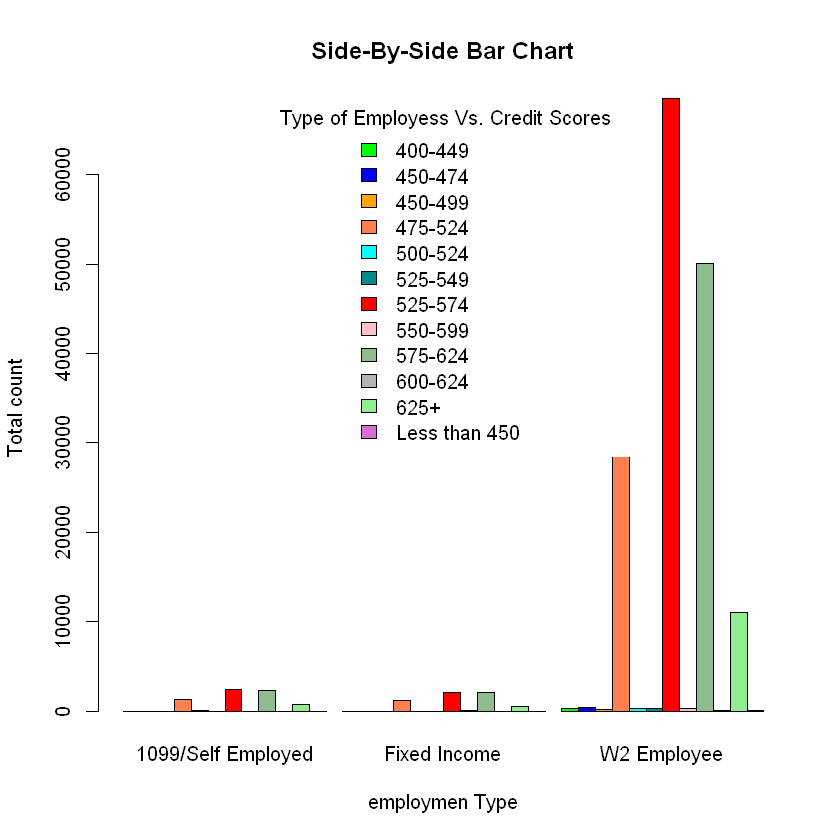

In [15]:
table1 <- table(analysis.anova$creditScore, analysis.anova$employmentType, dnn=c("creditScore,", "employmentType")) # Creates a contingency table
addmargins(table1) #Displays the table (Not necessary)
barplot(table1, ylab="Total count", xlab="employmen Type", main="Side-By-Side Bar Chart", col=c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), beside=TRUE, width=.3)
legend("top", title=" Type of Employess Vs. Credit Scores", legend= sort(unique(analysis.anova$creditScore)), fill =c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), box.lty=0)


,Live with Family,Other,Own/Buying,Rent,Sum
400-449,0,16,91,267,374
450-474,0,18,128,351,497
450-499,87,12,46,179,324
475-524,1,2893,9887,37962,50743
500-524,94,19,56,207,376
525-549,100,19,72,173,364
525-574,3,6427,16097,50546,73073
550-599,91,21,73,219,404
575-624,0,7575,16506,30426,54507
600-624,31,8,38,79,156


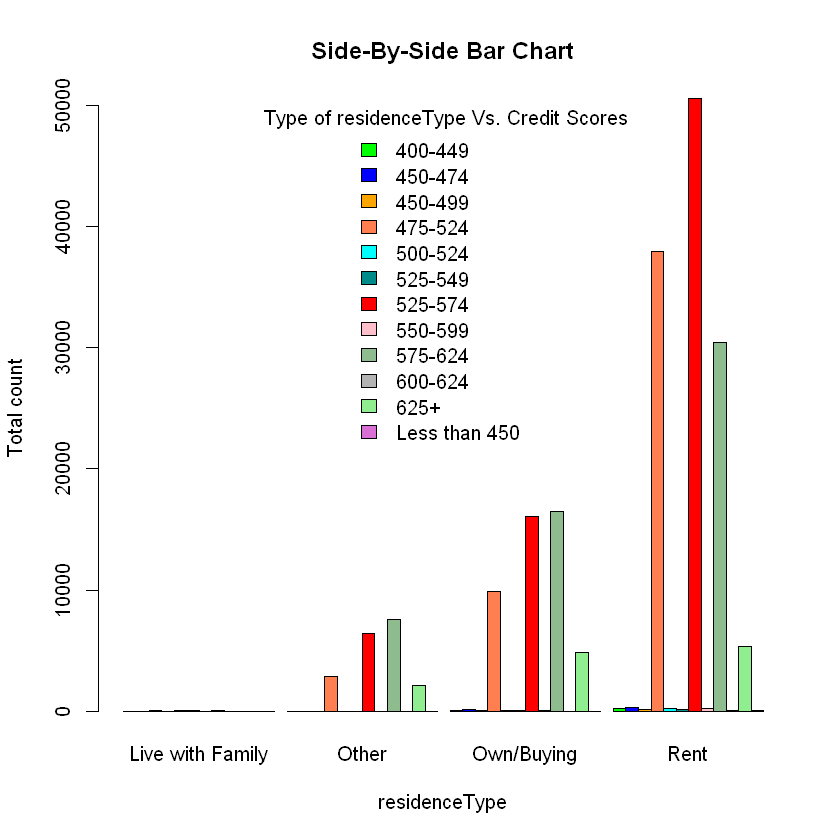

In [16]:
table1 <- table(analysis.anova$creditScore, analysis.anova$residenceType, dnn=c("creditScore", "residenceType")) # Creates a contingency table
addmargins(table1) #Displays the table (Not necessary)
barplot(table1, ylab="Total count", xlab="residenceType", main="Side-By-Side Bar Chart", col=c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), beside=TRUE, width=.3)
legend("top", title=" Type of residenceType Vs. Credit Scores", legend= sort(unique(analysis.anova$creditScore)), fill =c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), box.lty=0)


,AB,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Sum
400-449,0,2,13,3,4,24,3,5,0,1,...,19,43,2,13,0,3,7,3,0,374
450-474,0,1,14,3,8,24,7,5,0,7,...,17,68,6,10,0,2,3,5,0,497
450-499,0,0,11,4,4,44,4,2,0,4,...,4,40,5,7,0,6,3,3,0,324
475-524,0,71,2126,738,640,3259,393,310,91,206,...,1771,7363,299,1302,65,353,1022,443,59,50743
500-524,0,0,10,5,10,48,6,0,0,0,...,11,33,1,11,0,2,5,3,1,376
525-549,0,0,13,6,12,37,6,3,1,2,...,6,39,0,8,2,5,3,4,1,364
525-574,0,102,2576,1033,1002,5457,758,612,157,281,...,2600,8778,375,1927,148,532,1152,578,95,73073
550-599,0,2,11,7,9,46,5,4,2,2,...,11,40,1,3,0,3,4,7,1,404
575-624,0,82,1495,577,773,4806,726,534,92,181,...,1714,6218,316,1485,100,599,750,460,43,54507
600-624,0,0,6,3,3,18,1,3,0,1,...,0,16,1,6,0,4,1,1,0,156


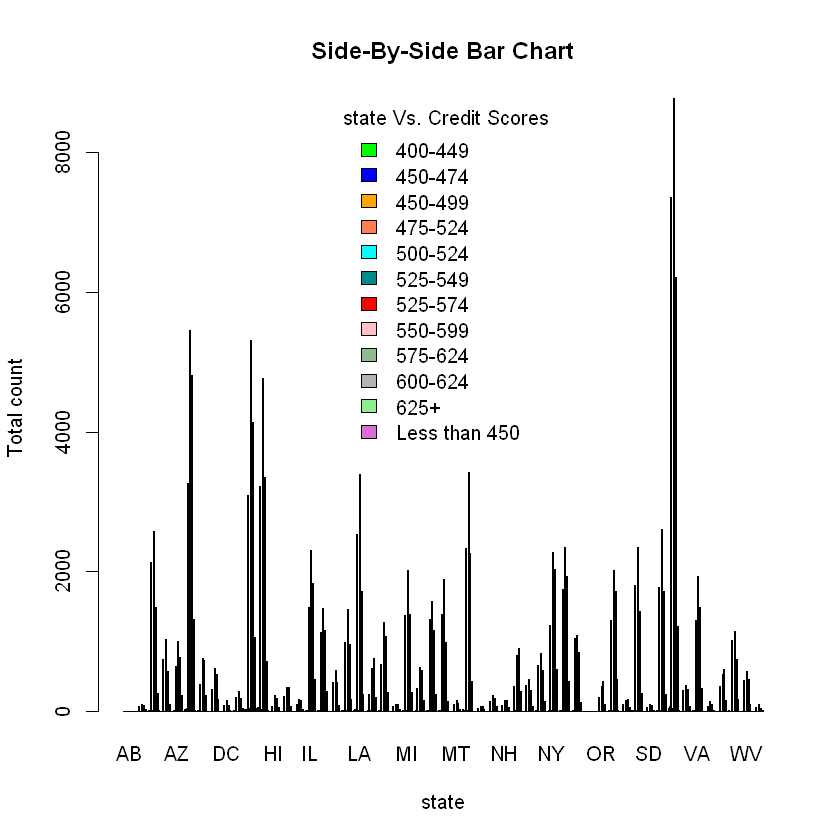

In [17]:
table1 <- table(analysis.anova$creditScore, analysis.anova$state, dnn=c("creditScore", "state")) # Creates a contingency table
addmargins(table1) #Displays the table (Not necessary)
barplot(table1, ylab="Total count", xlab="state", main="Side-By-Side Bar Chart", col=c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), beside=TRUE, width=.3)
legend("top", title=" state Vs. Credit Scores", legend= sort(unique(analysis.anova$creditScore)), fill =c("green", "blue", "orange","coral", "cyan", "darkcyan","red","pink","darkseagreen","gray70","lightgreen","orchid" ), box.lty=0)


<h2> Income per Employment Type </h2>

# A tibble: 3 x 4
  employmentType      `n()` `sum(monthlyIncome)` meansinc
  <fct>               <int>                <int>    <dbl>
1 1099/Self Employed   7054             52083728    7384.
2 Fixed Income         6325             40013347    6326.
3 W2 Employee        179957            775198614    4308.


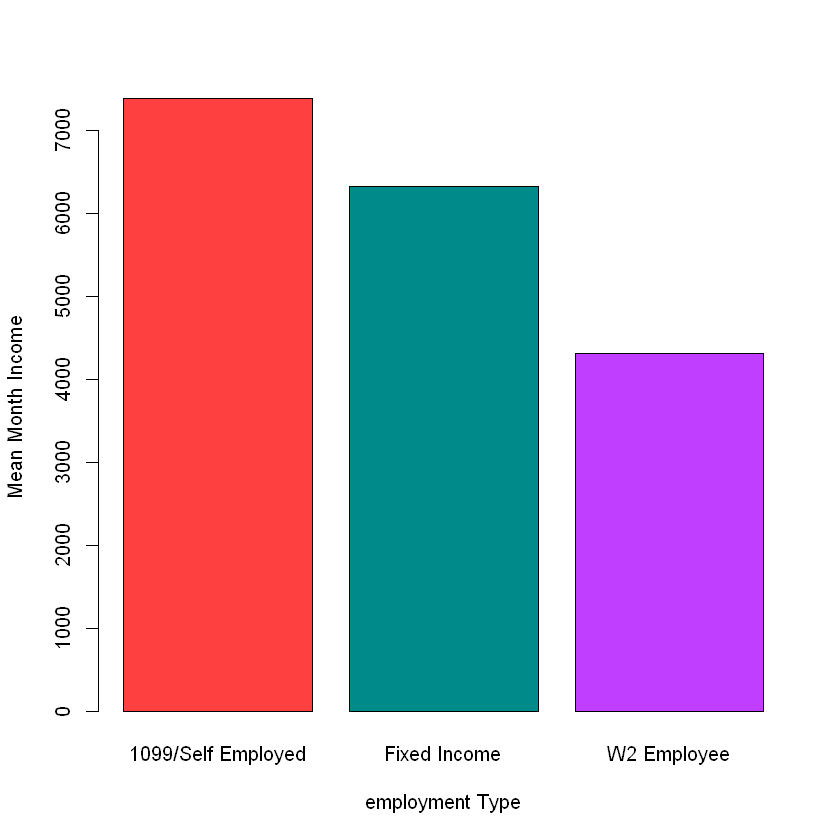

In [20]:
## count, monthly Income  - Income Average Per Empoyment Type
library(dplyr)
result <- analysis.anova %>% group_by(employmentType) %>%  summarize(n(), sum(monthlyIncome) , meansinc = mean(monthlyIncome))
#barplot(newdata$monthlyIncome, names.arg=newdata$emplomentType)
print(result)
#print(str(result))
category1 <- c("1099/Self Employed","Fixed Income" , "W2 Employee" )
colr <- c("brown1","darkcyan","darkorchid1")
barplot(result$meansinc, names.arg=category1, col =colr,  ylab="Mean Month Income", xlab="employment Type")




<h2>  INCOME per RESIDENT Type </h2>

# A tibble: 4 x 4
  residenceType     `n()` `sum(monthlyIncome)` meansinc
  <fct>             <int>                <int>    <dbl>
1 Live with Family    453              1375479    3036.
2 Other             19164            128501458    6705.
3 Own/Buying        47885            311477146    6505.
4 Rent             125834            425941606    3385.


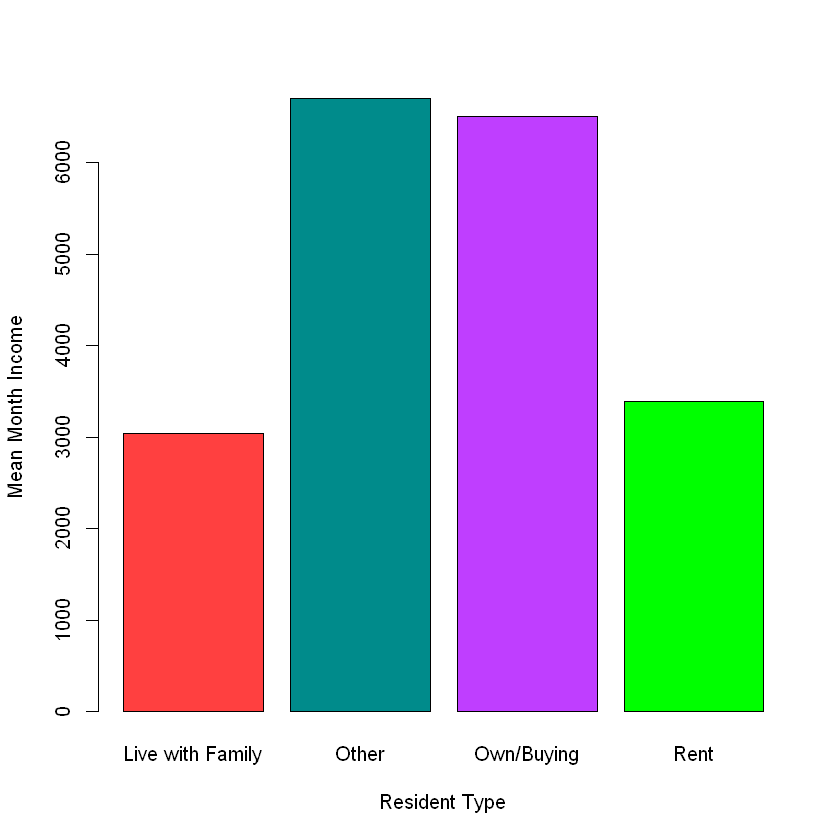

In [19]:
#print(str(unique(analysis.anova$residenceType)))
## count, monthly Income  - Income Average Per Resident Type
library(dplyr)
result <- analysis.anova %>% group_by(residenceType) %>%  summarize(n(), sum(monthlyIncome) , meansinc = mean(monthlyIncome))
#barplot(newdata$monthlyIncome, names.arg=newdata$emplomentType)
print(result)
#print(str(result))
category1 <- c("Live with Family","Other", "Own/Buying" , "Rent" )
colr <- c("brown1","darkcyan","darkorchid1","green1")
barplot(result$meansinc, names.arg=category1, col =colr , ylab="Mean Month Income", xlab="Resident Type")



<h2> STATE WISE AVERAGE INCOME </h2>

# A tibble: 53 x 4
   state `n()` `sum(monthlyIncome)` meansinc
   <fct> <int>                <int>    <dbl>
 1 AB        1                 3680    3680 
 2 AK      285             42635917  149600.
 3 AL     6536             17328089    2651.
 4 AR     2480              7286029    2938.
 5 AZ     2698              9863274    3656.
 6 CA    15085            107950615    7156.
 7 CO     2141              7836576    3660.
 8 CT     1643              6750116    4108.
 9 DC      364              2104352    5781.
10 DE      726              3994930    5503.
# ... with 43 more rows
 chr [1:54] "brown1" "darkcyan" "darkorchid1" "green1" "lightsteelblue4" ...
 chr [1:54] "AB" "AK" "AL" "AR" "AZ" "CA" "CO" "CT" "DC" "DE" "FL" "GA" ...


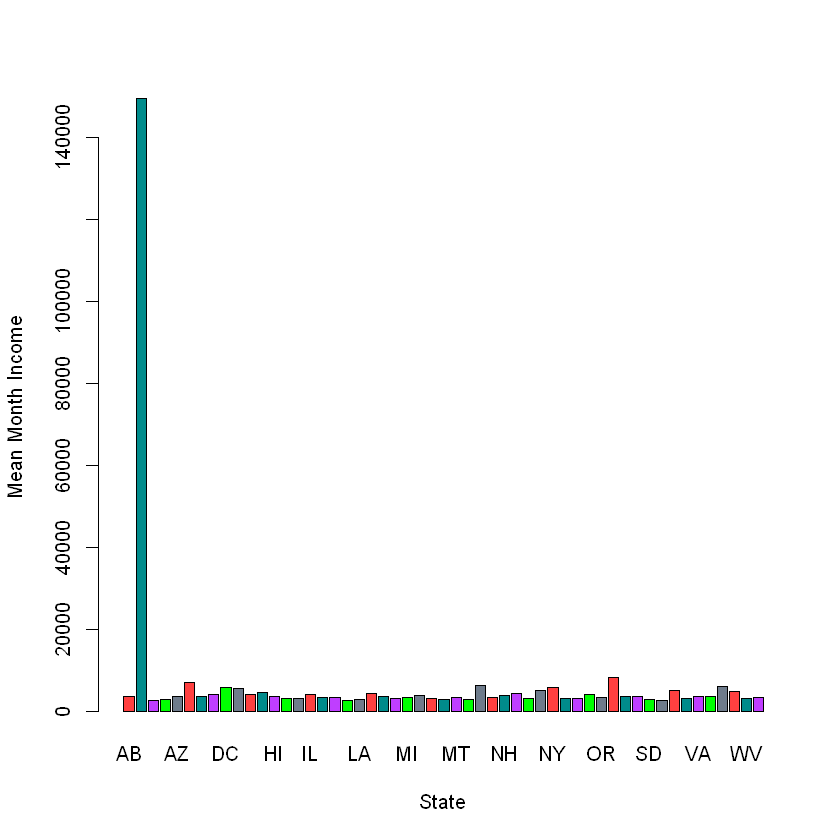

In [21]:
## count, monthly Income  - Income Average Per Empoyment Type
library(dplyr)
result <- analysis.anova %>% group_by(state) %>%  summarize(n(), sum(monthlyIncome) , meansinc = mean(monthlyIncome))
#barplot(newdata$monthlyIncome, names.arg=newdata$emplomentType)
print(result)
#print(str(result))
category1 <- c("AB","AK","AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MI","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","ON","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY")
colr <- c("brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1")
str(colr)
str(category1)

barplot(result$meansinc, names.arg=result$state, col=colr, ylab="Mean Month Income", xlab="State",)


<h2>## REMOVED state AK.
# STATE WISE AVERAGE INCOME</h2>

# A tibble: 52 x 4
   state `n()` `sum(monthlyIncome)` meansinc
   <fct> <int>                <int>    <dbl>
 1 AB        1                 3680    3680 
 2 AL     6536             17328089    2651.
 3 AR     2480              7286029    2938.
 4 AZ     2698              9863274    3656.
 5 CA    15085            107950615    7156.
 6 CO     2141              7836576    3660.
 7 CT     1643              6750116    4108.
 8 DC      364              2104352    5781.
 9 DE      726              3994930    5503.
10 FL    13793             55856205    4050.
# ... with 42 more rows
 chr [1:53] "brown1" "darkorchid1" "green1" "lightsteelblue4" "brown1" ...
 chr [1:53] "AB" "AL" "AR" "AZ" "CA" "CO" "CT" "DC" "DE" "FL" "GA" "HI" ...


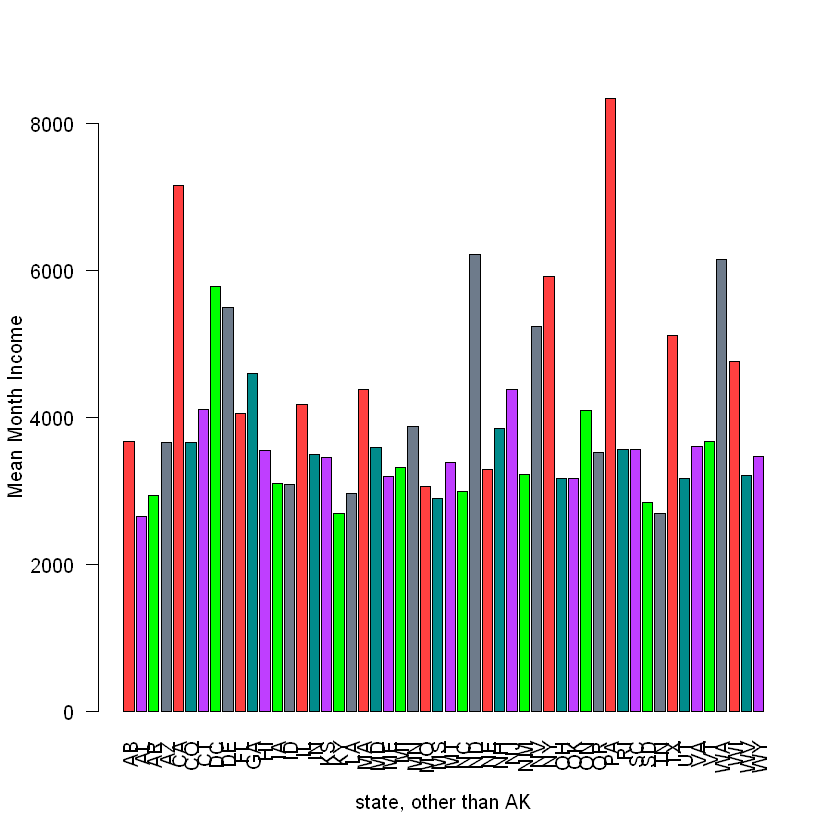

In [22]:
## REMOVED state AK.
# STATE WISE AVERAGE INCOME
library(dplyr)
#Filter and only required data
CleanAK <- subset(analysis.anova, state!="AK") 
result <- CleanAK  %>% group_by(state) %>%  summarize(n(), sum(monthlyIncome) , meansinc = mean(monthlyIncome))
#barplot(newdata$monthlyIncome, names.arg=newdata$emplomentType)
print(result)
#print(str(result))
category1 <- c("AB","AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","HI","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MI","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","ON","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY")
colr <- c("brown1","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1","lightsteelblue4","brown1","darkcyan","darkorchid1","green1")
str(colr)
str(category1)

barplot(result$meansinc, names.arg=result$state, col=colr,las=2,beside=F,width=.5, ylab="Mean Month Income", xlab="state, other than AK")
